In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from clustergram import Clustergram
import urbangrammar_graphics as ugg
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from kmodes.kprototypes import KPrototypes
from sklearn.decomposition import PCA

In [ ]:
#!pip install Clustergram
#!pip install urbangrammar_graphics
#!pip install kmodes

In [ ]:
df=pd.read_excel('random_sample.xlsx')

In [ ]:
df

,Unnamed: 0,id,gender,age,education,city,country,lbt_coef,ac_coef,sm_coef,personal_coef,product,colour,cost,product_sex,base_sale,dt
0,109119,28977,0,61,1,1178,32,6.031817,-0.248571,1.309000,0.5072,Брюки мужские Columbia Rapid Rivers Pant,серый,3439,1,1,51
1,192752,51934,1,30,1,1188,32,6.969758,-0.285773,1.093108,0.4304,Замок велосипедный ABUS Catena 6806K/75,синий,4299,2,0,8
2,385162,103613,0,29,1,1188,32,4.423638,0.174988,1.218755,0.5072,Сандалии женские Skechers D'Lux Walker,черный,3149,0,0,24
3,285272,77494,1,49,1,1134,32,8.382696,0.099023,1.206561,0.4304,Кроссовки мужские Demix Compact 5,черный,3149,1,1,19
4,712087,167273,1,38,1,1168,32,5.201284,-0.376200,0.963495,0.5072,Футболка мужская Quiksilver Sunset Logo Flaxton,желтый,849,1,1,43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,697184,130110,1,35,1,1188,32,5.424981,0.493496,1.443214,0.5072,Свитшот женский Termit,салатовый,1999,0,0,2
99996,707781,138979,1,55,1,1134,32,8.294610,-0.140131,0.434562,0.4304,Шорты плавательные мужские Joss,черный/зеленый,1259,1,1,32
99997,8048,2256,1,25,0,1202,32,7.177915,-0.311126,1.049417,0.4688,Кеды мужские Reebok Royal Complete Sport,белый,4619,1,1,50
99998,67715,18104,1,39,1,1188,32,7.358662,-0.155767,0.613244,0.4304,Кроссовки мужские 361° Flash,оранжевый/синий/белый,6299,1,1,36


In [ ]:
df.drop(['country','lbt_coef','ac_coef','sm_coef','Unnamed: 0','id'],axis=1,inplace=True)

In [ ]:
df

,gender,age,education,city,personal_coef,product,colour,cost,product_sex,base_sale,dt
0,0,61,1,1178,0.5072,Брюки мужские Columbia Rapid Rivers Pant,серый,3439,1,1,51
1,1,30,1,1188,0.4304,Замок велосипедный ABUS Catena 6806K/75,синий,4299,2,0,8
2,0,29,1,1188,0.5072,Сандалии женские Skechers D'Lux Walker,черный,3149,0,0,24
3,1,49,1,1134,0.4304,Кроссовки мужские Demix Compact 5,черный,3149,1,1,19
4,1,38,1,1168,0.5072,Футболка мужская Quiksilver Sunset Logo Flaxton,желтый,849,1,1,43
...,...,...,...,...,...,...,...,...,...,...,...
99995,1,35,1,1188,0.5072,Свитшот женский Termit,салатовый,1999,0,0,2
99996,1,55,1,1134,0.4304,Шорты плавательные мужские Joss,черный/зеленый,1259,1,1,32
99997,1,25,0,1202,0.4688,Кеды мужские Reebok Royal Complete Sport,белый,4619,1,1,50
99998,1,39,1,1188,0.4304,Кроссовки мужские 361° Flash,оранжевый/синий/белый,6299,1,1,36


In [ ]:
df_le=df.reset_index().drop("index",axis=1).apply(lambda series: pd.Series(LabelEncoder().fit_transform(series[series.notnull()]),index=series[series.notnull()].index))

In [ ]:
df_le

,gender,age,education,city,personal_coef,product,colour,cost,product_sex,base_sale,dt
0,0,42,1,290,2,896,635,533,1,1,51
1,1,11,1,300,0,2453,696,622,2,0,8
2,0,10,1,300,2,8404,871,500,0,0,24
3,1,30,1,246,0,4247,871,500,1,1,19
4,1,19,1,280,2,10449,259,181,1,1,43
...,...,...,...,...,...,...,...,...,...,...,...
99995,1,16,1,300,2,8575,569,351,0,0,2
99996,1,36,1,246,0,11541,912,248,1,1,32
99997,1,6,0,314,1,2986,64,649,1,1,50
99998,1,20,1,300,0,4169,486,777,1,1,36


In [ ]:
scaler = StandardScaler()
df_ss = scaler.fit_transform(df_le)

In [ ]:
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_ss)

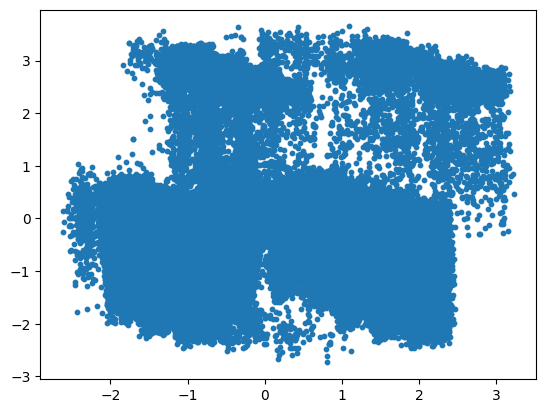

In [ ]:
plt.scatter(df_pca[:, 0], df_pca[:, 1], s=10)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


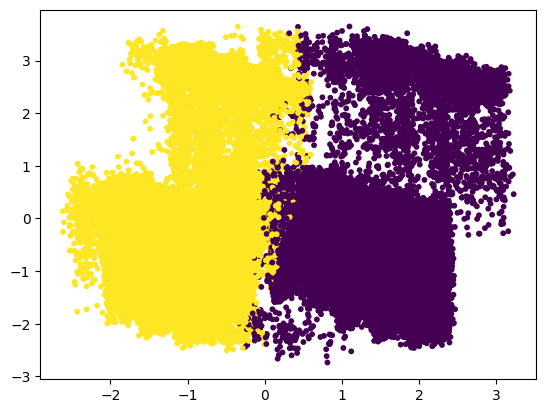

In [ ]:

kmeans = KMeans(n_clusters=2).fit(df_ss)
plt.scatter(df_pca[:, 0], df_pca[:, 1], s=10, c=kmeans.labels_)

In [ ]:
inertia = []
silhouette = []
N = 15
for k in range(2, N):
    kmeans = KMeans(n_clusters=k, random_state=1).fit(df_ss)
    preds = kmeans.predict(df_ss)
    inertia.append(np.sqrt(kmeans.inertia_))
    silhouette.append(silhouette_score(df_ss, preds))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

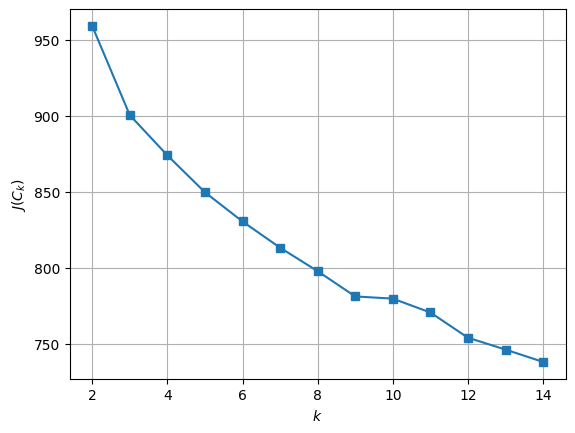

In [ ]:
plt.plot(range(2, N), inertia, marker='s');
plt.xlabel('$k$')
plt.grid()
plt.ylabel('$J(C_k)$');

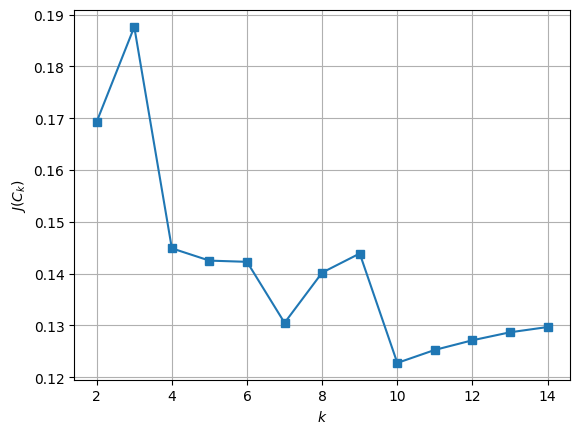

In [ ]:
plt.plot(range(2, N), silhouette, marker='s');
plt.xlabel('$k$')
plt.grid()
plt.ylabel('$J(C_k)$');

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


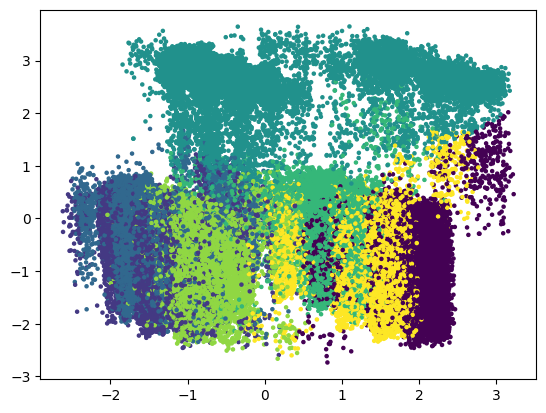

In [ ]:
kmeans = KMeans(n_clusters=7).fit(df_ss)
plt.scatter(df_pca[:, 0], df_pca[:, 1], s=5, c=kmeans.labels_)

In [ ]:
df['cluster'] = kmeans.labels_

In [ ]:
clustered_dfs = [df[df['cluster'] == i] for i in range(7)]

In [ ]:
for i, cluster_df in enumerate(clustered_dfs):
    print(f"Cluster {i}:\n", cluster_df.head())

Cluster 0:
     gender  age  education  city  personal_coef  \
0        0   61          1  1178         0.5072   
15       0   55          1  1159         0.5072   
17       0   61          1  1134         0.5072   
21       0   62          1  1183         0.5072   
37       0   41          1  1157         0.5072   

                                        product          colour  cost  \
0      Брюки мужские Columbia Rapid Rivers Pant           серый  3439   
15   Слипоны мужские Skechers Bounder Vertville           синий  2999   
17          Куртка утепленная женская Northland        болотный  5849   
21                       Купальник женский FILA     темно-синий  1349   
37  Сандалии для мальчиков Merrell Hydro Quench  черный/зеленый  3499   

    product_sex  base_sale  dt  cluster  
0             1          1  51        0  
15            1          1  18        0  
17            0          1  58        0  
21            0          1  54        0  
37            1          1   4  

In [ ]:
for i, cluster_df in enumerate(clustered_dfs):
    cluster_df.to_excel(f'cluster_{i}.xlsx', index=False)